In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/MachineLearning/master/dataset/SolarPrediction.csv")
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


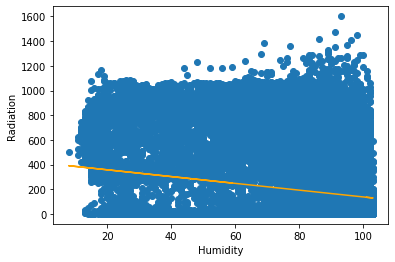

In [12]:
from sklearn.linear_model import LinearRegression
Linear_Reg = LinearRegression()
x=df.Humidity.values.reshape(-1,1)
y=df.Radiation.values.reshape(-1,1)
Linear_Reg.fit(x,y)
y_head=Linear_Reg.predict(x)
plt.scatter(df.Humidity,df.Radiation)
plt.xlabel("Humidity")
plt.ylabel("Radiation")
plt.plot(x,y_head,color="orange")

In [13]:
from sklearn.metrics import r2_score
print("r2_score",r2_score(y,y_head))

r2_score 0.05115316162229189


In [14]:
from sklearn.linear_model import LinearRegression
Multi_Linear_Reg = LinearRegression()
x=df.iloc[:,[4,5,6,7,8]].values
y=df.Radiation.values.reshape(-1,1)
Multi_Linear_Reg.fit(x,y)
y_head=Multi_Linear_Reg.predict(x)
print("b is:",Multi_Linear_Reg.intercept_)
print("k1,k2,k3,k4,k5 are:",Multi_Linear_Reg.coef_)

b is: [20983.84349734]
k1,k2,k3,k4,k5 are: [[ 3.83721364e+01 -7.47068686e+02 -2.69100502e-01 -2.69444468e-01
   7.87488444e+00]]


In [15]:
from sklearn.metrics import r2_score
print("r2_score",r2_score(y,y_head))

r2_score 0.5659393036276534


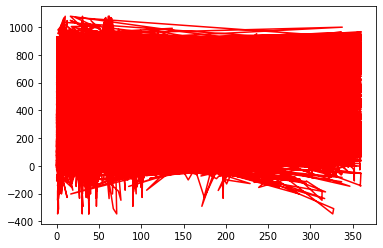

In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

polyno_reg=PolynomialFeatures(degree=4)
x_polyno=polyno_reg.fit_transform(x)

poly_reg=LinearRegression()
poly_reg.fit(x_polyno,y)
y_head=poly_reg.predict(x_polyno)
plt.plot(x,y_head,color="red")
plt.show()

In [17]:
from sklearn.metrics import r2_score
print("r2_score",r2_score(y,y_head))

r2_score 0.6910122920405233


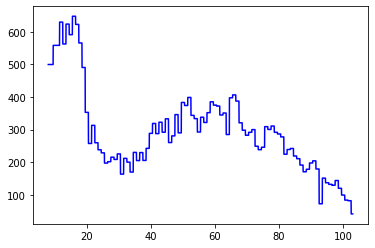

In [18]:
from sklearn.tree import DecisionTreeRegressor
Decision_Tree=DecisionTreeRegressor()
x=df.Humidity.values.reshape(-1,1)
y=df.Radiation.values.reshape(-1,1)
Decision_Tree.fit(x,y)
x_=np.arange(min(x),max(x),0.01).reshape(-1,1)
y_head=Decision_Tree.predict(x_)
plt.plot(x_,y_head,color="blue")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


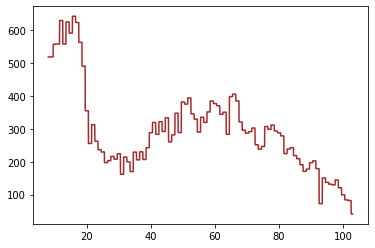

In [19]:
from sklearn.ensemble import RandomForestRegressor
Rand_forest=RandomForestRegressor(n_estimators=200,random_state=42)
Rand_forest.fit(x,y)
x_=np.arange(min(x),max(x),0.01).reshape(-1,1)
y_head=Rand_forest.predict(x_)
plt.plot(x_,y_head,color="brown")
plt.show()